## TEXT CLASSIFICATION USING NAIVE BAYES AND SENTIMENT ANALYSIS ON BLOG POSTS

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')

In [2]:
!pip install spacy

  Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl.metadata (59 kB)
Using cached numpy-2.0.2-cp312-cp312-win_amd64.whl (15.6 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 1.26.4
    Uninstalling numpy-1.26.4:
      Successfully uninstalled numpy-1.26.4


  You can safely remove it manually.
  You can safely remove it manually.
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
contourpy 1.2.0 requires numpy<2.0,>=1.20, but you have numpy 2.0.2 which is incompatible.
numba 0.59.1 requires numpy<1.27,>=1.22, but you have numpy 2.0.2 which is incompatible.
pywavelets 1.5.0 requires numpy<2.0,>=1.22.4, but you have numpy 2.0.2 which is incompatible.
streamlit 1.32.0 requires numpy<2,>=1.19.3, but you have numpy 2.0.2 which is incompatible.
tensorflow-intel 2.17.0 requires numpy<2.0.0,>=1.26.0; python_version >= "3.12", but you have numpy 2.0.2 which is incompatible.


In [3]:
!pip install wordcloud

  Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl.metadata (61 kB)
Using cached numpy-1.26.4-cp312-cp312-win_amd64.whl (15.5 MB)
  Attempting uninstall: numpy
    Found existing installation: numpy 2.0.2
    Uninstalling numpy-2.0.2:
      Successfully uninstalled numpy-2.0.2


ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
blis 1.0.1 requires numpy<3.0.0,>=2.0.0, but you have numpy 1.26.4 which is incompatible.
thinc 8.3.2 requires numpy<2.1.0,>=2.0.0; python_version >= "3.9", but you have numpy 1.26.4 which is incompatible.


In [4]:
import nltk

In [5]:
nltk.download('all')

[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_eng to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_eng is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     C:\Users\HP\AppData\Roaming\nltk_data...
[nltk_data]    |

True

In [6]:
import spacy
nlp=spacy.load('en_core_web_sm')

In [7]:
import numpy as np
import matplotlib.pyplot as plt

In [9]:
df=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\19 Naive Bayes and Text Mining\blogs.csv')

In [10]:
df

,Data,Labels
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism
...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,talk.religion.misc
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,talk.religion.misc
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,talk.religion.misc


In [11]:
df['Labels'].unique()

array(['alt.atheism', 'comp.graphics', 'comp.os.ms-windows.misc',
       'comp.sys.ibm.pc.hardware', 'comp.sys.mac.hardware',
       'comp.windows.x', 'misc.forsale', 'rec.autos', 'rec.motorcycles',
       'rec.sport.baseball', 'rec.sport.hockey', 'sci.crypt',
       'sci.electronics', 'sci.med', 'sci.space',
       'soc.religion.christian', 'talk.politics.guns',
       'talk.politics.mideast', 'talk.politics.misc',
       'talk.religion.misc'], dtype=object)

In [12]:
df.isnull().sum()

Data      3
Labels    0
dtype: int64

In [13]:
df.dropna(inplace=True)

In [14]:
df.isnull().sum()

Data      0
Labels    0
dtype: int64

In [15]:
df.duplicated().any()

False

In [16]:
df['length']=df['Data'].apply(len)

In [17]:
df.head()

,Data,Labels,length
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,5972
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,alt.atheism,1336
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,alt.atheism,3116
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,alt.atheism,15910
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,alt.atheism,3264


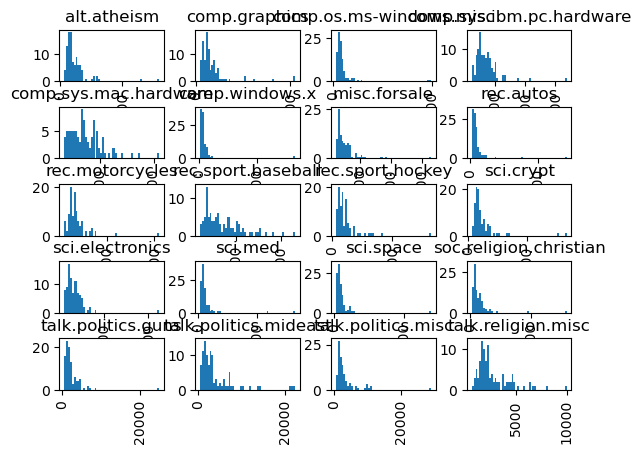

In [18]:
df.hist(by='Labels',bins=50)
plt.show();

In [19]:
df['length'].describe()

count     1997.000000
mean      2227.393090
std       2673.586661
min        425.000000
25%       1147.000000
50%       1605.000000
75%       2368.000000
max      32767.000000
Name: length, dtype: float64

### Data Cleaning

In [20]:
import string

In [21]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [22]:
from nltk.corpus import stopwords

In [23]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [24]:
from nltk.stem import WordNetLemmatizer
from nltk.stem.porter import PorterStemmer

In [25]:
lem=WordNetLemmatizer()
stem=PorterStemmer()

In [27]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer

In [28]:
## we define function to clean the data

In [29]:
def clean_words(text):
  doc=nlp(text)
  clean_text=[x.lemma_ for x in doc if not x.is_stop and not x.is_punct and not x.like_num and not x.is_bracket]
  clean_text=[stem.stem(i) for i in clean_text]
  return clean_text

In [30]:
count=CountVectorizer(analyzer=clean_words)

In [31]:
tfidf=TfidfTransformer()

In [32]:
x=count.fit_transform(df['Data'])

In [33]:
x.toarray()

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]], dtype=int64)

In [34]:
a=tfidf.fit_transform(x)

In [35]:
a.toarray()

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

### Naive Bayes Model for Text Classification

In [36]:
from sklearn.naive_bayes import MultinomialNB

In [37]:
multi=MultinomialNB()

In [38]:
multi.fit(a,df['Labels'])

MultinomialNB()

In [39]:
y_pred=multi.predict(a)

In [40]:
y_pred

array(['alt.atheism', 'alt.atheism', 'alt.atheism', ...,
       'rec.motorcycles', 'talk.religion.misc', 'talk.religion.misc'],
      dtype='<U24')

In [41]:
## check the accuracy and classification report
from sklearn.metrics import accuracy_score,classification_report

In [42]:
accuracy_score(df['Labels'],y_pred)

0.971957936905358

In [43]:
## train test split
from sklearn.model_selection import train_test_split

In [44]:
x_train,x_test,y_train,y_test=train_test_split(df['Data'],df['Labels'],train_size=0.75,random_state=100)

In [45]:
print(x_train.shape)
print(x_test.shape)
print(y_train.shape)
print(y_test.shape)

(1497,)
(500,)
(1497,)
(500,)


In [46]:
from sklearn.pipeline import Pipeline

In [47]:
pipeline=Pipeline([('count',CountVectorizer(analyzer=clean_words)),('tfidf',TfidfTransformer()),('multi',MultinomialNB())])

In [48]:
pipeline.fit(x_train,y_train)

Pipeline(steps=[('count',
                 CountVectorizer(analyzer=<function clean_words at 0x000001D7C5A8E340>)),
                ('tfidf', TfidfTransformer()), ('multi', MultinomialNB())])

In [49]:
y_pred=pipeline.predict(x_test)

In [50]:
accuracy_score(y_test,y_pred)

0.782

In [51]:
print(classification_report(y_test,y_pred))

                          precision    recall  f1-score   support

             alt.atheism       0.35      0.84      0.49        19
           comp.graphics       0.89      0.59      0.71        27
 comp.os.ms-windows.misc       1.00      0.63      0.78        30
comp.sys.ibm.pc.hardware       0.59      0.92      0.72        25
   comp.sys.mac.hardware       0.79      0.65      0.71        23
          comp.windows.x       0.83      0.86      0.84        22
            misc.forsale       0.73      0.62      0.67        26
               rec.autos       0.95      0.70      0.81        27
         rec.motorcycles       0.45      0.89      0.60        19
      rec.sport.baseball       1.00      0.94      0.97        33
        rec.sport.hockey       0.79      0.85      0.82        27
               sci.crypt       1.00      0.96      0.98        27
         sci.electronics       0.95      0.76      0.84        25
                 sci.med       0.95      0.71      0.82        28
         

In [52]:
## overall testing accuracy is 78%

In [53]:
## training validation
y_pred_train=pipeline.predict(x_train)

In [54]:
accuracy_score(y_train,y_pred_train)

0.9665998663994656

In [55]:
## training accuracy is 97%, we can say that this is a decent model and does not overfit

### Sentiment Analysis

In [56]:
from nltk.tokenize import sent_tokenize,word_tokenize

In [118]:
df1=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\19 Naive Bayes and Text Mining\blogs.csv')

In [119]:
df1.drop('Labels',axis=1,inplace=True)

In [120]:
df1.dropna(inplace=True)

In [121]:
df1.head()

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...


In [122]:
df1.isnull().sum()

Data    0
dtype: int64

In [123]:
df1.duplicated().any()

False

In [124]:
df1

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...
...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....


In [125]:
import wordcloud

In [126]:
from wordcloud import WordCloud,STOPWORDS

In [127]:
set(STOPWORDS)

{'a',
 'about',
 'above',
 'after',
 'again',
 'against',
 'all',
 'also',
 'am',
 'an',
 'and',
 'any',
 'are',
 "aren't",
 'as',
 'at',
 'be',
 'because',
 'been',
 'before',
 'being',
 'below',
 'between',
 'both',
 'but',
 'by',
 'can',
 "can't",
 'cannot',
 'com',
 'could',
 "couldn't",
 'did',
 "didn't",
 'do',
 'does',
 "doesn't",
 'doing',
 "don't",
 'down',
 'during',
 'each',
 'else',
 'ever',
 'few',
 'for',
 'from',
 'further',
 'get',
 'had',
 "hadn't",
 'has',
 "hasn't",
 'have',
 "haven't",
 'having',
 'he',
 "he'd",
 "he'll",
 "he's",
 'hence',
 'her',
 'here',
 "here's",
 'hers',
 'herself',
 'him',
 'himself',
 'his',
 'how',
 "how's",
 'however',
 'http',
 'i',
 "i'd",
 "i'll",
 "i'm",
 "i've",
 'if',
 'in',
 'into',
 'is',
 "isn't",
 'it',
 "it's",
 'its',
 'itself',
 'just',
 'k',
 "let's",
 'like',
 'me',
 'more',
 'most',
 "mustn't",
 'my',
 'myself',
 'no',
 'nor',
 'not',
 'of',
 'off',
 'on',
 'once',
 'only',
 'or',
 'other',
 'otherwise',
 'ought',
 'our',
 

In [128]:
## we will try to visualize words of first blog

In [129]:
text=data[:1]

In [130]:
text

,Data
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...


In [131]:
import re

In [132]:
text1=re.sub('[^A-Za-z]+',' ',str(text))

In [133]:
text2=text1.strip()

In [134]:
def wordcloud(df):
  plt.figure(figsize=(10,10))
  plt.imshow(df)
  plt.axis('off')

In [135]:
data1=WordCloud(width=1000,height=1000,background_color='black',colormap='plasma').generate(text2)

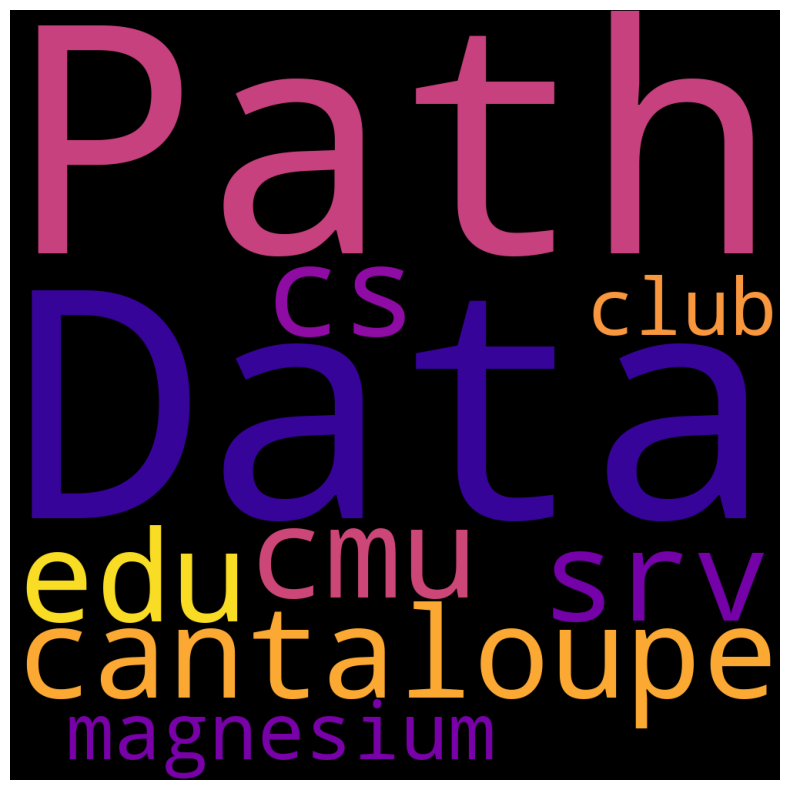

In [136]:
wordcloud(data1)

In [137]:
## Afinn is one of the data that can be used to calculate sentiment value

In [138]:
aff=pd.read_csv(r'C:\D Drive\Data_Science\01 Assignments\19 Naive Bayes and Text Mining\Afinn.csv',encoding='latin-1')

In [139]:
aff.head()

,word,value
0,abandon,-2
1,abandoned,-2
2,abandons,-2
3,abducted,-2
4,abduction,-2


In [140]:
## define a function to calculate sentiment value
aff_dict=aff.set_index('word')['value'].to_dict()
def sentiment_value(text:str=None):
  sent_count=0
  if text:
    doc=nlp(text)
    for words in doc:
      sent_count+= aff_dict.get(words.lemma_,0)
    return sent_count

In [141]:
## example
sentiment_value('2023')

0

In [142]:
sentiment_value('cantaloupe')

0

In [143]:
df1['sentiment_count']=df1['Data'].apply(sentiment_value)

In [145]:
df1['word_count']=df1['Data'].str.split().apply(len)
df1

,Data,sentiment_count,word_count
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-21,910
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,9,163
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-30,450
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-128,2732
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,8,438
...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,8,782
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,4,208
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,6,219
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,16,469


In [146]:
## for visualization

In [147]:
df1['index']=range(len(df1))

In [148]:
df1.head()

,Data,sentiment_count,word_count,index
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-21,910,0
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,9,163,1
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-30,450,2
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-128,2732,3
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,8,438,4


In [149]:
import seaborn as sns

<Axes: xlabel='index', ylabel='sentiment_count'>

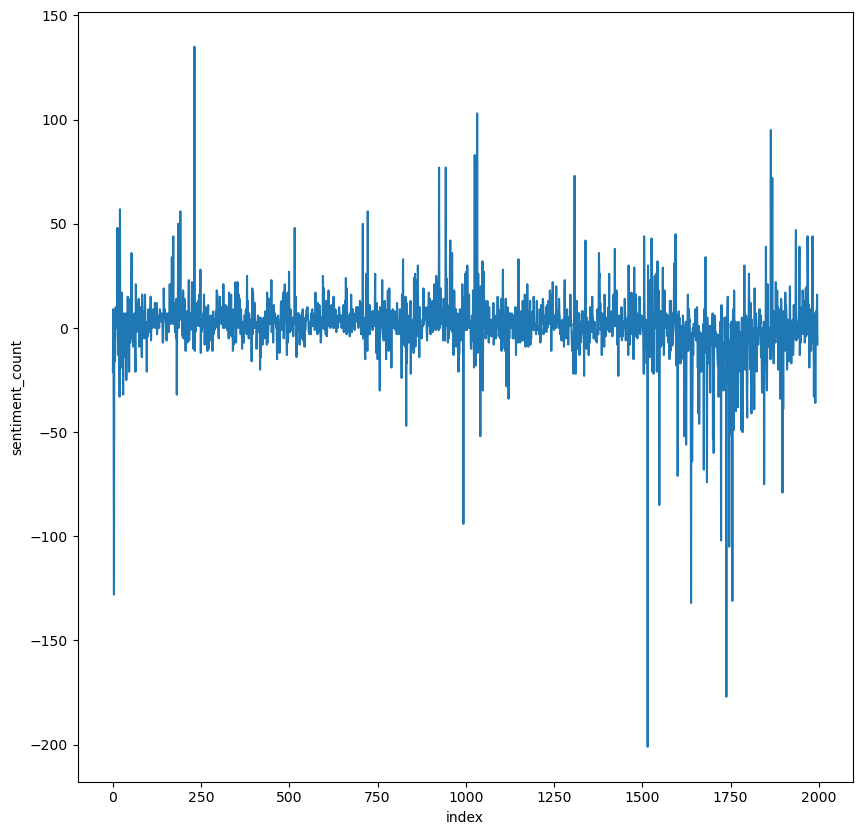

In [150]:
plt.figure(figsize=(10,10))
sns.lineplot(data=df1,x='index',y='sentiment_count')

<Axes: xlabel='sentiment_count', ylabel='Density'>

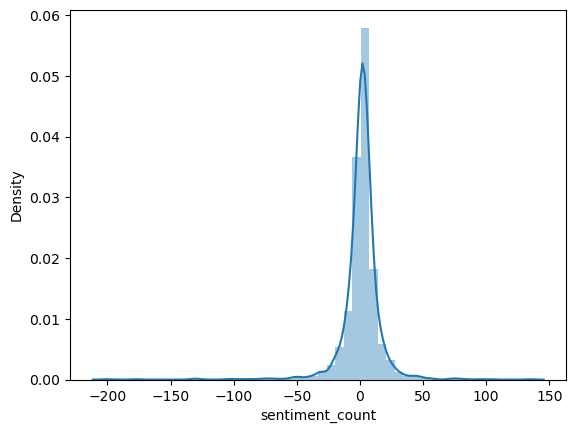

In [151]:
sns.distplot(df1['sentiment_count'])

In [152]:
## we will also use textblob to calculate sentiment polarity

In [153]:
!pip install textblob

   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
   ---------------------------------------- 0.0/626.3 kB ? eta -:--:--
    --------------------------------------- 10.2/626.3 kB ? eta -:--:--
   -- ------------------------------------ 41.0/626.3 kB 393.8 kB/s eta 0:00:02
   --------------- ------------------------ 245.8/626.3 kB 1.9 MB/s eta 0:00:01
   ---------------------------------------  624.6/626.3 kB 3.3 MB/s eta 0:00:01
   ---------------------------------------- 626.3/626.3 kB 3.0 MB/s eta 0:00:00


In [154]:
from textblob import TextBlob

In [155]:
## we define a function to calculate sentiment polarity
def sentiment(text):
  blob=TextBlob(text)
  sentiment_count=blob.sentiment.polarity
  if sentiment_count>0:
    return 1
  else:
    return 0

In [156]:
## examples
sentiment('great')

1

In [157]:
sentiment('bad')

0

In [158]:
df1['text_blob_sentiment_count']=df1['Data'].apply(sentiment)

In [159]:
df1

,Data,sentiment_count,word_count,index,text_blob_sentiment_count
0,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-21,910,0,1
1,Newsgroups: alt.atheism\nPath: cantaloupe.srv....,9,163,1,0
2,Path: cantaloupe.srv.cs.cmu.edu!das-news.harva...,-30,450,2,1
3,Path: cantaloupe.srv.cs.cmu.edu!magnesium.club...,-128,2732,3,1
4,Xref: cantaloupe.srv.cs.cmu.edu alt.atheism:53...,8,438,4,1
...,...,...,...,...,...
1995,Xref: cantaloupe.srv.cs.cmu.edu talk.abortion:...,8,782,1992,1
1996,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,4,208,1993,1
1997,Xref: cantaloupe.srv.cs.cmu.edu talk.origins:4...,6,219,1994,1
1998,Xref: cantaloupe.srv.cs.cmu.edu talk.religion....,16,469,1995,1


In [160]:
df1['sentiment_count'].sum()

2468

In [161]:
## we see that overall we get a positive sentiment from the combined data from all the blogs

In [162]:
## sentiment analysis can be used to understand public opinions about products, services, brands, politics, or any topic that people can express opinions about.
## it can help provide customers a personalised experience of the products and services.